In [3]:
### SET WORKING DIRECTORY ###
setwd('BData/')
## lecture des données
mydata <- read.csv("Tmaxp1.csv", header = TRUE)
## Affiche les 6 premières lignes
head(mydata)

,NumStation,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,DJF,MAM,JJA,SON,Annual
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10202001,5.6181664,7.053195,10.542954,14.31947,18.42190,21.97930,24.62309,24.06197,21.00561,15.77572,9.939825,6.368421,6.323041,14.42929,23.57191,15.57594,15.02081
2,18242001,5.6258065,7.750000,11.037993,14.84901,18.34707,22.43704,25.33763,24.33130,21.72568,16.23751,10.011235,6.315651,6.524280,14.74356,24.05270,15.99418,15.37510
3,21010001,-0.3354839,5.160714,8.651613,17.74667,17.55806,21.53667,26.10645,25.82258,24.29333,16.61613,9.246667,5.670968,3.443333,14.61848,24.52065,16.71758,14.88219
4,21038001,3.9630273,6.079670,10.247643,14.06821,17.91464,22.41179,25.46923,24.31216,21.27256,15.44442,8.728205,5.474194,5.142051,14.07692,24.08236,15.15165,14.66367
5,21043001,4.2238949,6.138624,9.445639,13.65148,17.52043,21.46062,24.25006,23.28053,20.59667,15.36033,8.777531,5.251374,5.173498,13.53796,23.01377,14.91644,14.20759
6,21106001,-1.2806452,3.771429,6.767742,15.63000,15.21935,19.67333,23.93226,23.74839,22.94000,15.25161,8.263333,5.354839,2.576667,12.50543,22.48152,15.48242,13.31397


In [4]:
MFST <- read.csv("MFStationsTnxRGF93.csv", header = TRUE)
## Affiche les 6 premières lignes
head(MFST)

,field_1,NumStation,Alti,xcoord,ycoord
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,10202001,150,781781.8,6776271
2,2,18242001,205,694282.0,6635542
3,3,21010001,273,840532.2,6664609
4,4,21038001,185,880184.5,6679350
5,5,21043001,407,823600.4,6723468
6,6,21106001,211,858883.8,6683658


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.42   14.39   14.80   14.59   15.14   15.92 

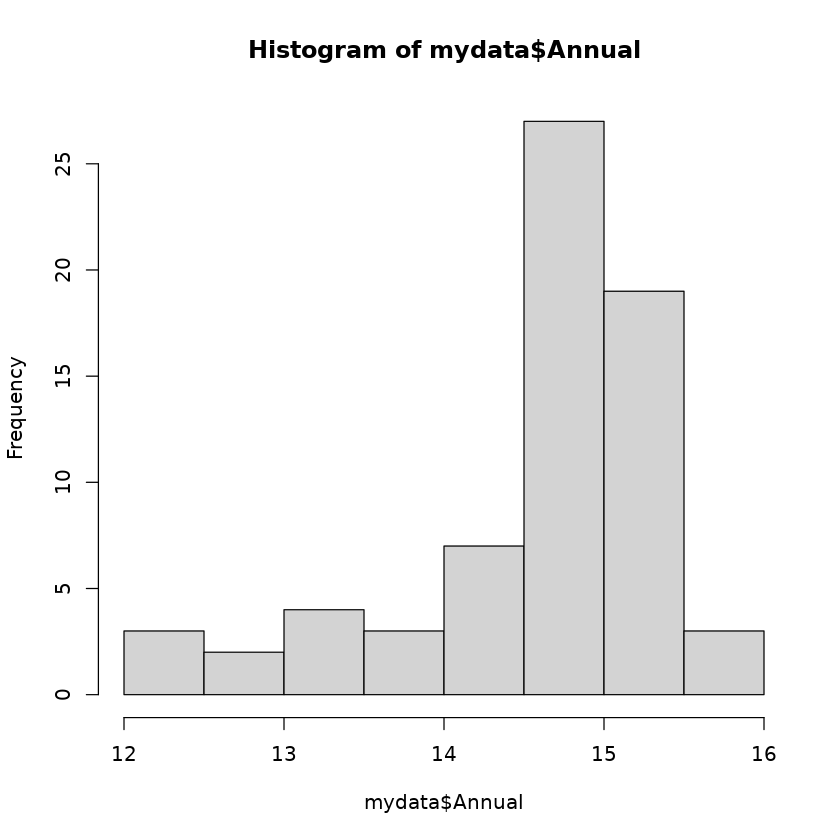

In [5]:
hist(mydata$Annual, breaks=10) ## affiche histogramme 
summary(mydata$Annual) ## résumé des statistiques

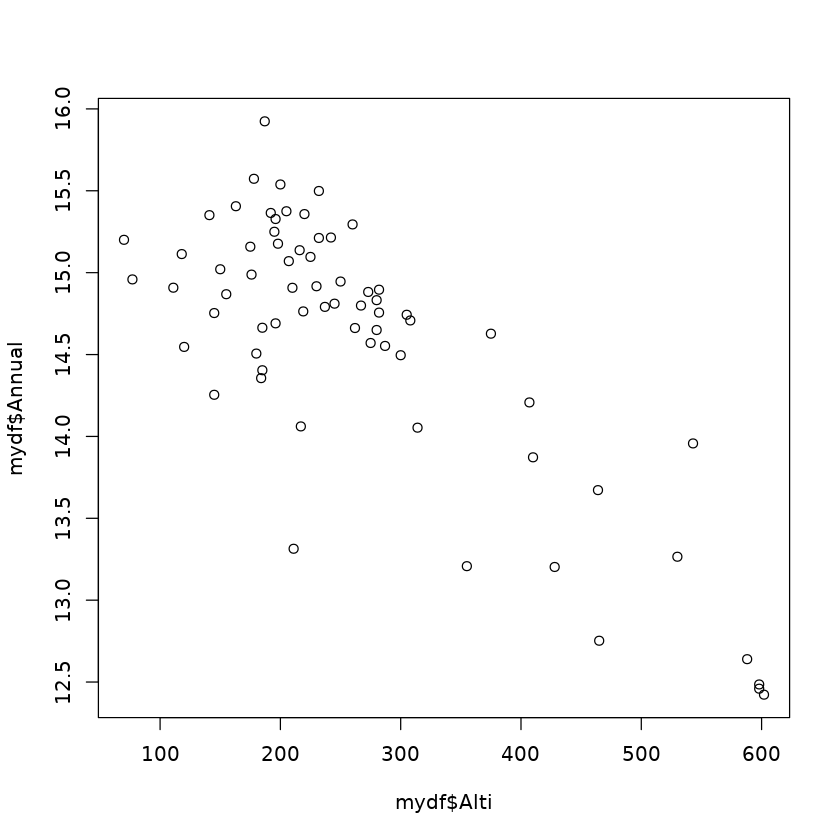

In [6]:
mydf <- merge(MFST, mydata[,c("NumStation","Annual")], by = "NumStation")
plot(mydf$Annual ~ mydf$Alti) ## plot 2D -- relation entre 2 variables

In [7]:
####################################################################
##
## Corrélation
##
#####################################################################
cor(mydf$Annual, mydf$Alti, method="pearson")
cor.test(mydf$Annual, mydf$Alti)

[1] -0.8030767


	Pearson's product-moment correlation

data:  mydf$Annual and mydf$Alti
t = -10.949, df = 66, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8741291 -0.6983713
sample estimates:
       cor 
-0.8030767 



Call:
lm(formula = Annual ~ Alti, data = mydf)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55131 -0.34637  0.09003  0.33390  0.93657 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.9404569  0.1363756  116.89   <2e-16 ***
Alti        -0.0050956  0.0004654  -10.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4873 on 66 degrees of freedom
Multiple R-squared:  0.6449,	Adjusted R-squared:  0.6396 
F-statistic: 119.9 on 1 and 66 DF,  p-value: < 2.2e-16


(Intercept)         Alti 
15.940456917 -0.005095594

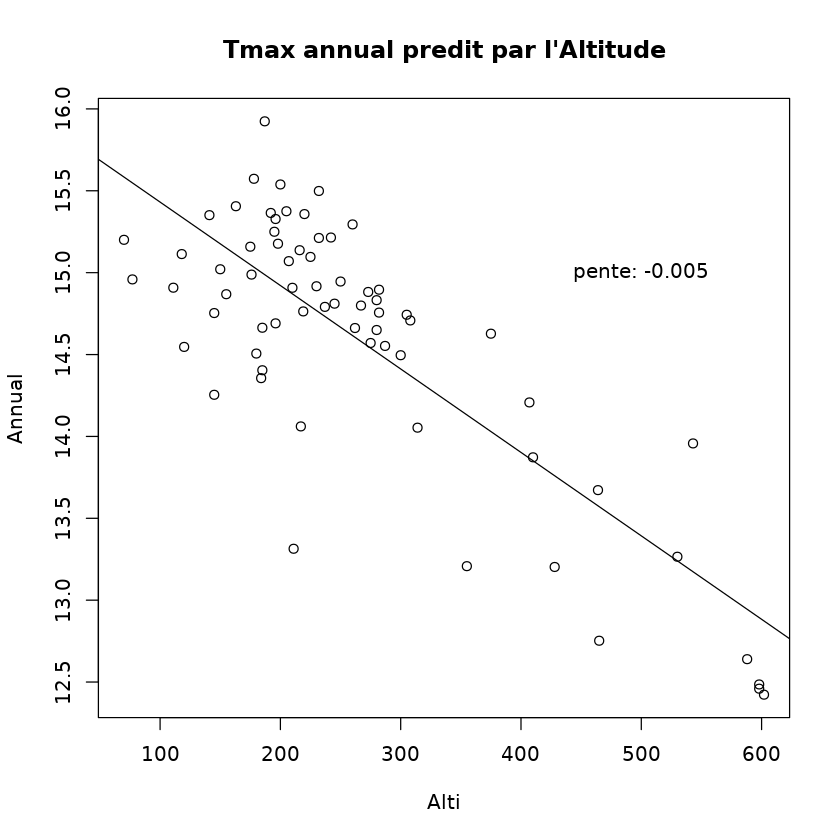

In [8]:
####################################################################
##
## Regression linéaire Tmax = a*Alti+b
##
#####################################################################
model.TmaxYear <- lm(Annual ~ Alti, data = mydf)
summary(model.TmaxYear)
coefficients(model.TmaxYear)

plot(Annual ~ Alti, data = mydf)
title("Tmax annual predit par l'Altitude")
abline(model.TmaxYear)
text(500, 15, paste("pente:", round(coefficients(model.TmaxYear)[2], 3)))

In [9]:
mlm.Tmax <- lm(Annual ~ Alti + ycoord + xcoord, data = mydf)
summary(mlm.Tmax)


Call:
lm(formula = Annual ~ Alti + ycoord + xcoord, data = mydf)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58300 -0.23309 -0.03344  0.31120  0.98871 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.956e+01  7.491e+00   5.282 1.64e-06 ***
Alti        -5.701e-03  4.532e-04 -12.581  < 2e-16 ***
ycoord      -3.550e-06  1.051e-06  -3.378  0.00125 ** 
xcoord       3.016e-07  1.150e-06   0.262  0.79391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4449 on 64 degrees of freedom
Multiple R-squared:  0.7131,	Adjusted R-squared:  0.6996 
F-statistic: 53.02 on 3 and 64 DF,  p-value: < 2.2e-16


In [10]:
mlm.Tmax <- lm(Annual ~ Alti + ycoord, data = mydf)
summary(mlm.Tmax)$r.squared

[1] 0.7127707

In [12]:
library(bootstrap)
theta <- function(x, xdata){summary(lm(xdata[x,"Annual"] ~ xdata[x,"Alti"] + xdata[x,"ycoord"]))$r.squared}
resujack <- jackknife(1:nrow(mydf),theta,mydf)
resuboot <- bootstrap(1:nrow(mydf), 100, theta, mydf)

In [14]:
#hist(resuboot$thetastar)
str(mydf)

'data.frame':	68 obs. of  6 variables:
 $ NumStation: int  10202001 18242001 21010001 21038001 21043001 21106001 21154001 21196001 21228001 21277001 ...
 $ field_1   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Alti      : int  150 205 273 185 407 211 262 232 588 232 ...
 $ xcoord    : num  781782 694282 840532 880184 823600 ...
 $ ycoord    : num  6776271 6635542 6664609 6679350 6723468 ...
 $ Annual    : num  15 15.4 14.9 14.7 14.2 ...


In [18]:
###################################################
### A quelle résolution spatiale minimale on peut prétendre en fonction de l'échantillon
## cf. Hengl (2006) p1289, p1289
## Méthode basée sur la densité de l'échantillon
###################################################

myarea <- (max(mydf$xcoord)-min(mydf$xcoord))*(max(mydf$ycoord)-min(mydf$ycoord))
mypixsize <- 0.0791 * sqrt(myarea/length(mydf$Annual))
mypixsize

[1] 2150.955

In [19]:
library(sf)
## liste les couhces présentes dans le fichier gpkg (format QGIS)
st_layers('BDBourgogneRGF93.gpkg')
## lecture de la couche 
drias <- st_read('BDBourgogneRGF93.gpkg', layer = 'Grille_Drias')

Linking to GEOS 3.9.0, GDAL 3.2.2, PROJ 7.2.1



Driver: GPKG 
Available layers:
       layer_name     geometry_type features fields
1    Grille_Drias             Point      497      4
2 LimDptBourgogne Multi Line String       24      5

Reading layer `Grille_Drias' from data source 
  `/home/thierry/works/workDominante/M05_GeoSpatEnv_2021_2022/BData/BDBourgogneRGF93.gpkg' 
  using driver `GPKG'
Simple feature collection with 497 features and 4 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 693891.1 ymin: 6568997 xmax: 886000.6 ymax: 6801965
Projected CRS: RGF93 / Lambert-93


In [28]:
library(geojsonio)
str(drias)

Classes ‘sf’ and 'data.frame':	497 obs. of  5 variables:
 $ idpt  : num  9378 9379 9380 9381 9382 ...
 $ alti  : num  307 298 388 362 489 192 293 286 405 405 ...
 $ xcoord: num  772805 780797 788790 796782 804775 ...
 $ ycoord: num  6569540 6569475 6569408 6569341 6569263 ...
 $ geom  :sfc_POINT of length 497; first list element:  'XY' num  772805 6569540
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA
  ..- attr(*, "names")= chr [1:4] "idpt" "alti" "xcoord" "ycoord"


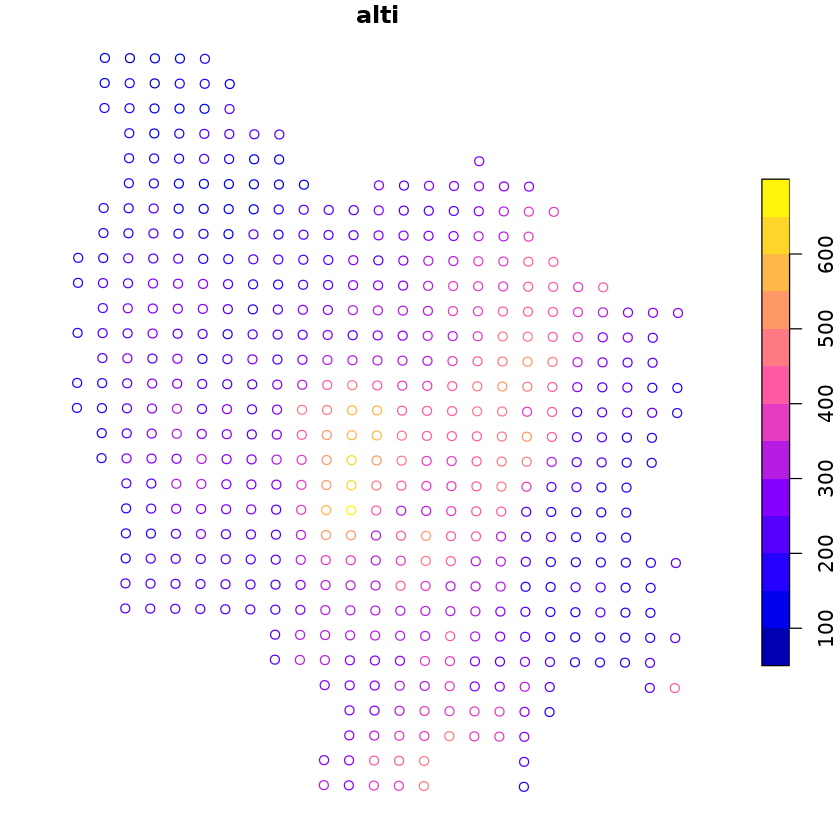

In [32]:
plot(drias["alti"])

In [36]:
coef(mlm.Tmax)
Tmax.drias <- coef(mlm.Tmax)[1] + coef(mlm.Tmax)[2] * drias$alti + coef(mlm.Tmax)[3]*drias$ycoord

(Intercept)          Alti        ycoord 
 4.060977e+01 -5.691134e-03 -3.670732e-06

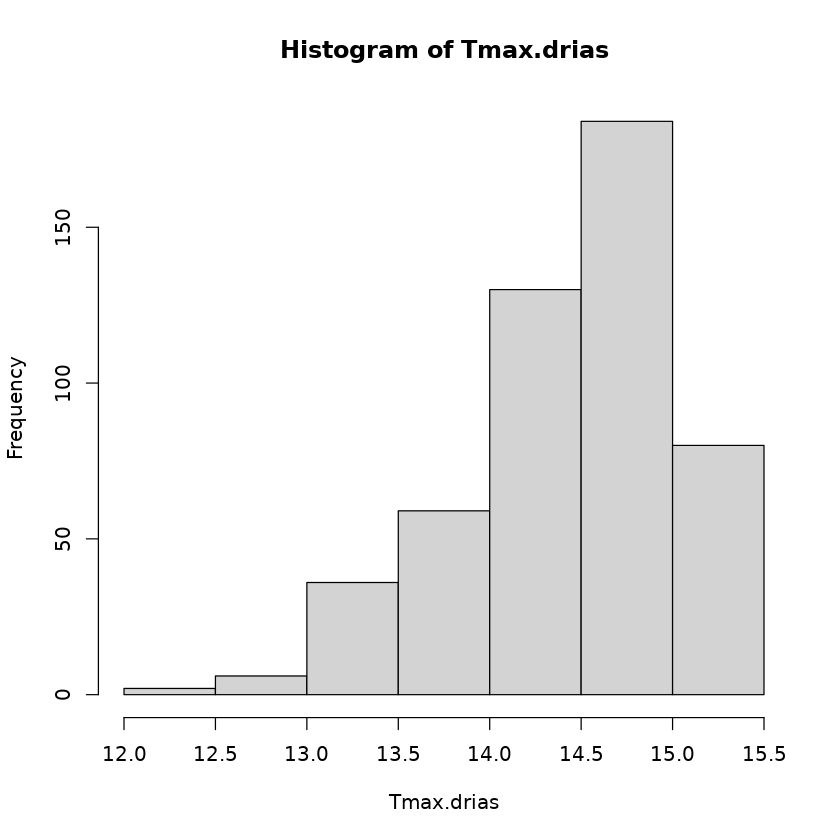

In [37]:
hist(Tmax.drias)

In [41]:
drias$Tmaxannualp1 <- Tmax.drias
str(drias)

Classes ‘sf’ and 'data.frame':	497 obs. of  7 variables:
 $ idpt        : num  9378 9379 9380 9381 9382 ...
 $ alti        : num  307 298 388 362 489 192 293 286 405 405 ...
 $ xcoord      : num  772805 780797 788790 796782 804775 ...
 $ ycoord      : num  6569540 6569475 6569408 6569341 6569263 ...
 $ geom        :sfc_POINT of length 497; first list element:  'XY' num  772805 6569540
 $ Tmaxannual  : num  14.7 14.8 14.3 14.4 13.7 ...
 $ Tmaxannualp1: num  14.7 14.8 14.3 14.4 13.7 ...
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA
  ..- attr(*, "names")= chr [1:6] "idpt" "alti" "xcoord" "ycoord" ...


In [40]:
st_write(drias, 'BDBourgogneRGF93.gpkg', layer = 'Tmax_annualp1')

Writing layer `Tmax_annual' to data source `BDBourgogneRGF93.gpkg' using driver `GPKG'
Writing 497 features with 5 fields and geometry type Point.
